In [13]:
import os
import pandas as pd

#s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris','iris.data')
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


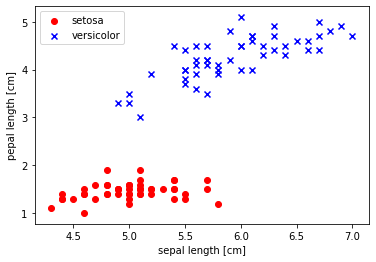

In [14]:
import matplotlib.pyplot as plt
import numpy as np

#1-100行目の目的変数抽出
y = df.iloc[0:100, 4].values

#Iris-setosaを-1にIris-versicolorを1に変換
y = np.where(y == 'Iris-setosa', -1, 1)

#1-100行目の1, 3列目を抽出
X = df.iloc[0:100, [0,2]].values

#品種setosaのプロット（赤）
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')

#品種versicolorのプロット（青）
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')

#軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('pepal length [cm]')

#凡例の設定
plt.legend(loc='upper left')
#図の表示
plt.show()

In [15]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

<function matplotlib.pyplot.show(*args, **kw)>

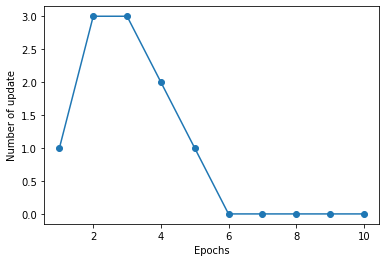

In [16]:
#パーセプトロンのオブジェクトの生成（インスタンス化）
ppn = Perceptron(eta = 0.1, n_iter = 10)
#訓練データへのモデルの適合
ppn.fit(X, y)
#エポックと誤分類の関係を表す折れ線グラフをプロット
plt.plot(range(1,len(ppn.errors_) +1), ppn.errors_, marker='o')
#軸のレベルの設定
plt.xlabel('Epochs')
plt.ylabel('Number of update')
#図の表示
plt.show

In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    #マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1,X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    #グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    #各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #予測結果を元のグリッドポイントのデータサイズに変換
    Z =Z.reshape(xx1.shape)
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.3, cmap=cmap)
    #軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #クラスごとに訓練データをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                   y=X[y == cl, 1],
                   alpha = 0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label = cl,
                   edgecolor='black')

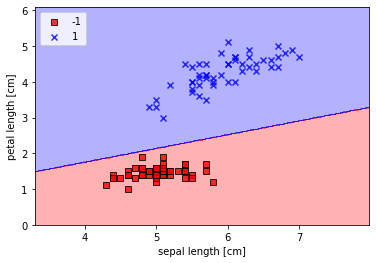

In [18]:
#決定領域のプロット
plot_decision_regions(X, y,classifier=ppn)
#軸のラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
#凡例の設定（左上に配置）
plt.legend(loc='upper left')
#図の表示
plt.show()

In [19]:
class AdalineGD(object):
    """ADAptive Linear NEuron分類器

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      各エポックでの誤差平方和のコスト関数
      
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for _ in range(self.n_iter):#訓練回数分まで訓練データを反復
            net_input = self.net_input(X)
            output = self.activation(net_input)
            
            #誤差の計算
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            #コスト関数の計算
            cost = (errors**2).sum()/2.0
            #コストの格納
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        #線形活性化関数の出力を計算
        return X


    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X) )>= 0.0, 1, -1)

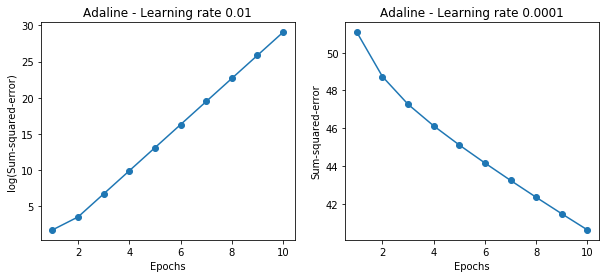

In [20]:
import matplotlib.pyplot as plt

#描画領域を１行２列に分割
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
#勾配降下法によるADALINEの学習（学習率　eta = 0.01）
ada1 = AdalineGD(n_iter=10, eta = 0.01).fit(X,y)
#エポック数とコストの関係を表す折れ線グラフのプロット（縦軸のコストは常用対数）
ax[0].plot(range(1,len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
#軸のラベルの設定
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
#タイトルの設定
ax[0].set_title('Adaline - Learning rate 0.01')
#勾配降下法によるADALINEの学習（学習率eta=0.0001）
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
#エポック数とコストの関係を表す折れ線グラフのプロット
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
#軸のラベルの設定
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
#タイトルの設定
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [21]:
#データのコピー
X_std = np.copy(X)
#各列の標準化
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

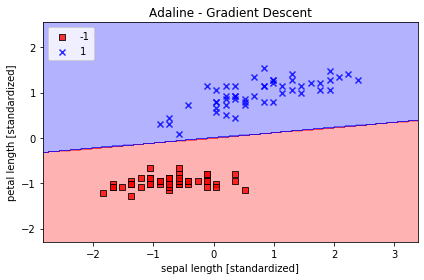

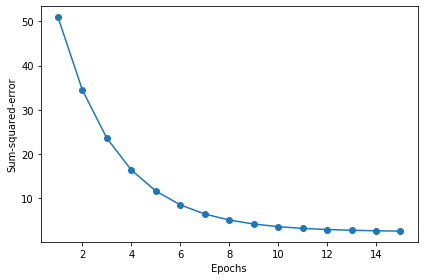

In [22]:
#勾配降下法によるADALINEの学習（標準化後、学習率eta = 0.01）
ada_gd = AdalineGD(n_iter=15, eta = 0.01)
#モデルの適合
ada_gd.fit(X_std, y)
#境界領域のプロット
plot_decision_regions(X_std, y, classifier=ada_gd)
#タイトルの設定
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

In [37]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive Linear NEuron分類器

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle :bool (デフォルト：True)
      Trueの場合は、循環を回避するためにエポックごとに訓練データをシャッフル
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      各エポックですべての訓練データの平均を求める誤差平方和コスト関数
      
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta#学習率の初期化
        self.n_iter = n_iter#訓練回数の初期化
        self.w_initialized = False#重みの初期化フラグはFalseに設定
        self.shuffle = shuffle#各エポックで訓練データをシャッフルするかどうかのフラグを初期化
        self.random_state = random_state#乱数シードを設定

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        #重みベクトルの生成
        self._initialize_weights(X.shape[1])
        #コストを格納するリストの生成
        self.cost_ = []

        for i in range(self.n_iter):#訓練回数分まで訓練データを反復
            #指定された場合は訓練データをシャッフル
            if self.shuffle:
                X, y = self._shuffle(X, y)
            #各訓練データのコストを格納するリストの生成
            cost = []
            #各訓練データにたいする計算
            for xi, target in zip(X, y):
                #特徴量xiと目的変数yを用いた重みの更新とコストの計算
                cost.append(self._update_weights(xi, target))
            #訓練データの平均コストの計算
            avg_cost = sum(cost)/len(y)
            #平均コストを格納
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """重みを再初期化することなく訓練データに適合させる"""
        #初期化されていない場合は初期化を実行
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        #目的変数yの要素数が2以上の場合は各訓練データの特徴量xiと目的変数targetで重みを更新
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        #目的変数yの要素数が１の場合は訓練データ全体の特徴量Xと目的変数yで重みを更新
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """訓練データをシャッフル"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """重みを小さな乱数に初期化"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """ADALINEの学習規則を用いて重みを更新"""
        #活性化関数の出力の計算
        output = self.activation(self.net_input(xi))
        #誤差の計算
        error = (target-output)
        #重みの更新
        self.w_[1:] += self.eta * xi.dot(error)
        #重みw0の更新
        self.w_[0] += self.eta * error
        #コストの計算
        cost = 0.5*error**2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        #線形活性化関数の出力を計算
        return X


    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X) )>= 0.0, 1, -1)

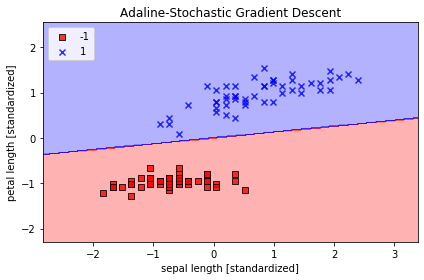

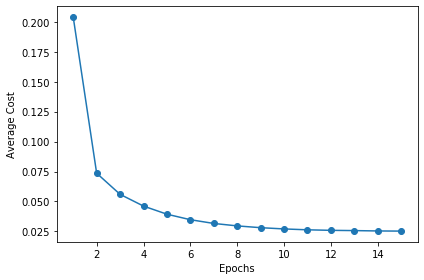

In [38]:
#確率的勾配降下法によるADALINEの学習
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
#モデルへの適合
ada_sgd.fit(X_std, y)
#境界領域のプロット
plot_decision_regions(X_std, y, classifier=ada_sgd)
#タイトルの設定
plt.title('Adaline-Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()